In [1]:
import numpy as np
import scipy.stats as st
import pylab

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Просто некоторые настройки для графиков
plt.rcParams["figure.figsize"] = (11, 11)
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.35, rc={"lines.linewidth": 3.5})

В методе _mean_confidence_interval_ использую эту формулу для вычисления доверительного интервала среднего выборочного при неизвестной дисперсии:
$$P\left( \overline{X} - \frac{\sqrt{S^2} t_{n - 1, 1 - \alpha/2}}{\sqrt{n}} < \theta < \overline{X} + \frac{\sqrt{S^2} t_{n - 1, 1 - \alpha/2}}{\sqrt{n}} \right) = 1 - \alpha$$

In [3]:
def mean_confidence_interval(data, confidence=0.99):
    X = np.mean(data)
    S2 = np.var(data, ddof=1)
    t = st.t(df=len(data) - 1).ppf(1 - (1 - confidence) / 2)

    return {'X':X, 'S^2':S2, 't':t,\
           'interval':(X - (np.sqrt(S2) * t) / np.sqrt(len(data)),\
           X + (np.sqrt(S2) * t) / np.sqrt(len(data)))}


def quantiles(means, confidence=0.9):
    return np.quantile(means, (1 - confidence) / 2),\
           np.quantile(means, 1 - (1 - confidence) / 2)

---
# а)

In [4]:
data = np.array([31, 12, 28, 33, 23, 34, 9, 18, 26, 25,
                 18, 33, 12, 28, 11, 22, 32, 26, 22, 29])

In [5]:
mean_confidence_interval(data, 0.9)

{'X': 23.6,
 'S^2': 63.199999999999996,
 't': 1.729132811521367,
 'interval': (20.526226279567716, 26.673773720432287)}

---
# б)

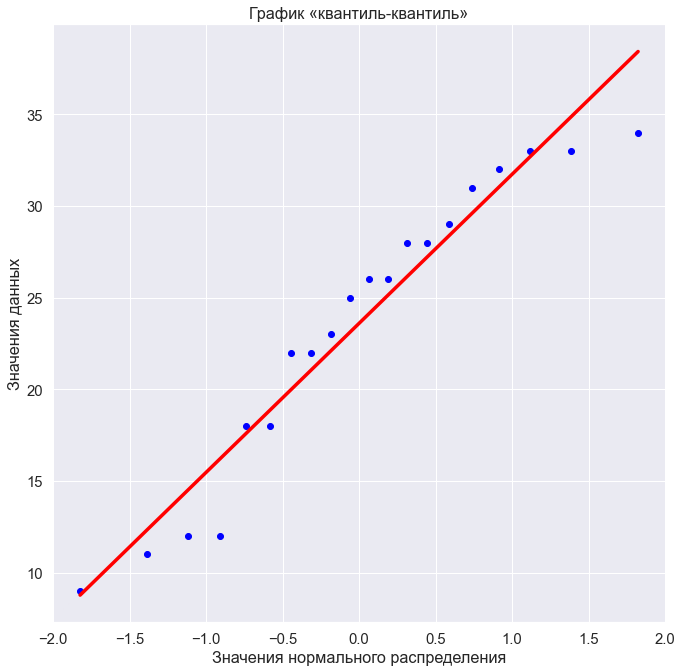

In [6]:
st.probplot(data, dist="norm", plot=pylab)

pylab.title("График «квантиль-квантиль»")
plt.xlabel("Значения нормального распределения")
plt.ylabel("Значения данных")
pylab.show()

In [7]:
data2 = np.array([24, 22, 25, 19, 24, 17, 20, 16, 23,
                  25, 15, 22, 21, 16, 24, 20, 22, 24])

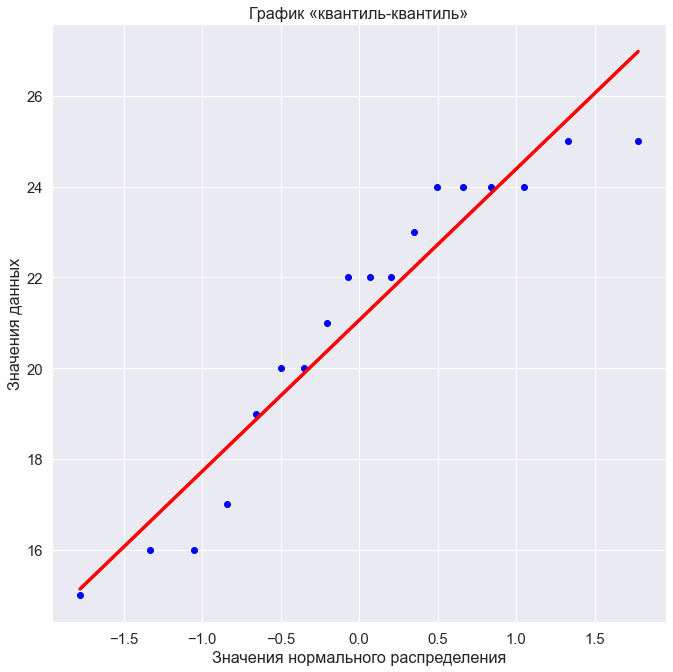

In [8]:
st.probplot(data2, dist="norm", plot=pylab)

pylab.title("График «квантиль-квантиль»")
plt.xlabel("Значения нормального распределения")
plt.ylabel("Значения данных")
pylab.show()

---
# в)

In [9]:
means = np.array([np.random.choice(data, len(data), replace=True).mean()
                  for i in range(100000)])

In [10]:
quantiles(means, 0.9)

(20.7, 26.4)

---
# г)

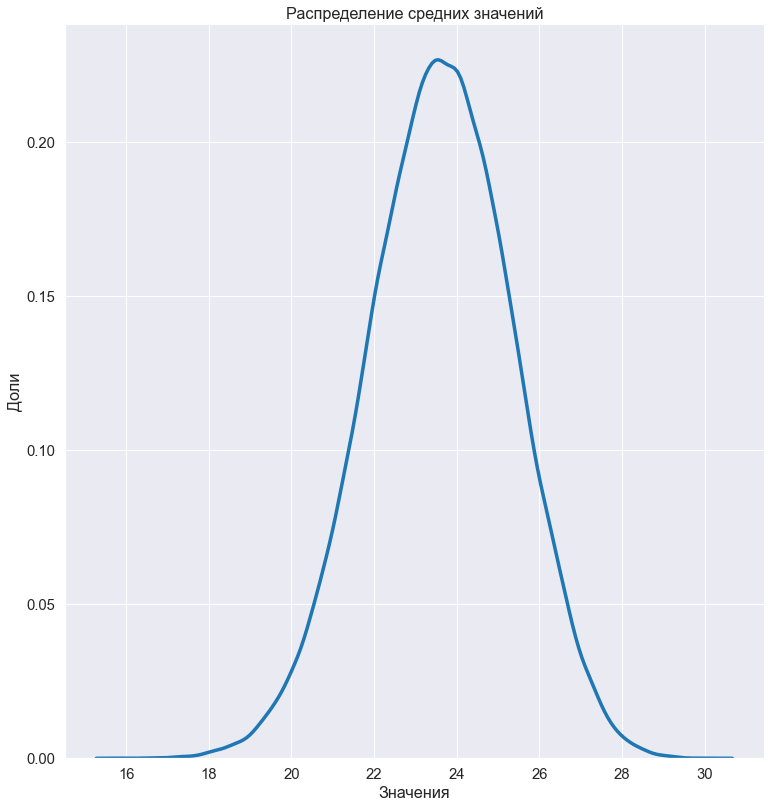

In [11]:
sns.displot(data=means, kind="kde", height=11)

plt.title("Распределение средних значений")
plt.xlabel("Значения")
plt.ylabel("Доли")
plt.show()